In [1]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import pandas as pd

Time independent Schrödinger equation for bounded states in one dimension:
$$\left(-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}+V(x)\right)\psi(x)=E\psi(x)$$
with boundary conditions $$\psi(-\infty)=0$$ $$\psi(+\infty)=0$$

The problem is an eigenfunctions and eigenvalues problem.

# Direct matrix method
Aplicando la  **fórmula de diferencia centrada** para aproximar la segunda derivada a segundo orden en $dr$, la parte radial de la ecuación de Schrödinger se puede escribir como

$$\frac{-ħ^2}{2m}\frac{\psi_{j+1}-2\psi_{j}+\psi_{j-1}}{\Delta r^2}+V_{eff,j}\psi_j=E\psi_j + O(Δr^2)$$

haciendo $k=\frac{ħ^2}{2m\Delta r^2}$:

$$\left( -k\delta_{j+1,k} + (2k+V_{eff,j})\delta_{j,k} - k\delta_{j-1,k}\right)\psi_k=E\psi_k$$


con $\psi_0=\psi_{N-1}=0$ obtenemos una ecuación de autovalores

$$H\psi=E\psi$$

donde $H_{ij}=-k\delta_{j+1,k} + (2k+V_{eff,j})\delta_{j,k} - k\delta_{j-1,k} $

So simply solving for the eignevalues and eigenvectors of H we get the wave functions $ψ_j$ and their associated energy eigenvalues E.

H is a symmetric triadiagonal matrix so we can use the pack eigh_tridiagonal from scipy.


In [54]:
#Example with the harmonic oscillator

#Params

m = 1
h_bar = 1
w = 1
L = 10
N = 10000
def V(x):
  return m*w**2*x**2/2

x = np.linspace(-L,L,N)
dx = x[1]-x[0]
k = h_bar**2/(2*m*dx**2)
d = 2*k+V(x)[1:-1] #diagonal elements of the discretised hamiltonian
e = -k*np.ones(len(d)-1) #non diagonal elements of the discretised hamiltonian

Energy, psi = eigh_tridiagonal(d,e) #Find the eigenvalues and eigenfunctios of H.

0.4999998749447712 0.5
1.499999374856273 1.5
2.4999983746595835 2.5


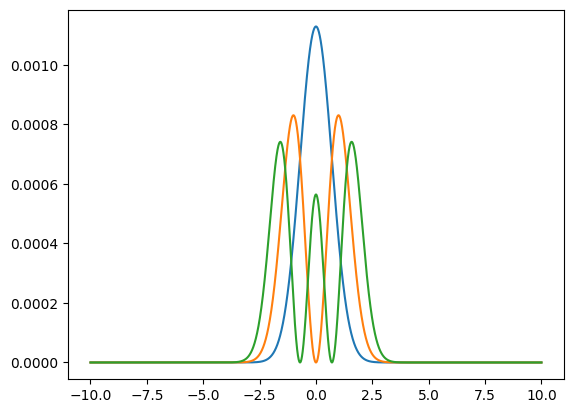

In [55]:
for i in range(3):
  print(Energy[i], w*(i+1/2))
  plt.plot(x[1:-1],psi.T[i]**2)

# 3D problems with Central Potential.

**Schrödinger equation:**

$$-\frac{ħ}{2m}∇^{2}ψ(r,\theta,\phi) + V(r)\psi(r,\theta,\phi) = E\psi(r,\theta,\phi)$$

$\psi_{nlm}(r,\theta,ϕ) = \frac{1}{r}P_{ln}(r)Y^{m}_{l}(θ,ϕ)$

We obtain the radial differential equation

$$-\frac{\hbar^2}{2m}\frac{d^2P_{ln}}{dr^2}+V_{eff}(r)P_{ln}(r)=E_nP_{ln}(r)$$

where:




*   $V_{eff}(r) = V(r) + \frac{\hbar^2l(l+1)}{2mr^2} $
*   $P_{ln}(r)$: Radial probability density, satisfies the boundary conditions:

$$P_{ln}(0)=P_{ln}(∞)=0$$






In [56]:
#Hartree energy
Eh = 27.211386018
m = 1
h_bar = 1
R = 500
N = 20000
def V(r):
  return -1/r

def Veff(r,l):
  return V(r) + h_bar**2*l*(l+1)/(2*m*r**2)

r = np.linspace(1e-15,R,N)
dr = r[1]-r[0]
k = h_bar**2/(2*m*dr**2)
d = 2*k+Veff(r,0)[1:-1] #diagonal elements of the discretised hamiltonian
e = -k*np.ones(len(d)-1) #non diagonal elements of the discretised hamiltonian

Energy, psi = eigh_tridiagonal(d,e) #Find the eigenvalues and eigenfunctios of H.

print("Autovalores de energía para el átomo de hidrógeno")
for n in range(10):
  print(Energy[n]*Eh)


-13.603567571076496
-3.4012903812560054
-1.511717420410095
-0.850347508138971
-0.5442243186315924
-0.37793427641624894
-0.27766631876634496
-0.21258843420443918
-0.16797119457932141
-0.1360567174800177


In [2]:
Eh = 27.211386018
h_bar = 1
R = 50
N = 10000
#LiH
De = 2.515283695/27.21
re = 1.5956*10/5.29
m = 0.8801221/(5.45*10**(-4))

def V(r):
  return -2*De*(re/r-re**2/(2*r**2))

def Veff(r,l):
  return V(r) + h_bar**2*l*(l+1)/(2*m*r**2)

r = np.linspace(1e-15,R,N)
dr = r[1]-r[0]
k = h_bar**2/(2*m*dr**2)
#LiH
De = 2.515283695/27.21
re = 1.5956*10/5.29
m = 0.8801221/(5.45*10**(-4))
LiH = []
for l in range(6):
  d = 2*k+Veff(r,l)[1:-1]
  e = -k*np.ones(len(d)-1)
  Energy, psi = eigh_tridiagonal(d,e)
  for i in range(l,6):
    LiH.append(Energy[i]*Eh)

LiH = sorted(LiH)
print(LiH)

[-2.4676124403213935, -2.376443728090006, -2.3747442442046514, -2.290247110739442, -2.288639205400553, -2.285430239360108, -2.2086661287833818, -2.20714331830006, -2.204104093780155, -2.199561180527144, -2.1313758676818098, -2.129932234718759, -2.127050954115572, -2.122743933941292, -2.1170288810834625, -2.058079645323044, -2.056709780222045, -2.053975657604721, -2.0498884346160056, -2.0444647030390493, -2.03772631969422]


In [4]:
#I2
R = 50
N = 10000
r = np.linspace(1e-15,R,N)
dr = r[1]-r[0]
De = 1.581791863/27.21
re =  2.662*10/5.29
m = 63.45223502/(5.45*10**(-4))
I2 = []
for l in range(6):
  d = 2*k+Veff(r,l)[1:-1]
  e = -k*np.ones(len(d)-1)
  Energy, psi = eigh_tridiagonal(d,e)
  for i in range(l,6):
    I2.append(Energy[i]*Eh)

I2 = sorted(I2)
print(I2)

[-1.5742434712364402, -1.5591684559687524, -1.5591594241697462, -1.5443093074981866, -1.5443004044964788, -1.5442825988019464, -1.5296619120882458, -1.5296531354405105, -1.5296355824484582, -1.529609253718901, -1.5152222539250557, -1.5152136012458404, -1.5151962961854857, -1.5151703393401206, -1.5151357316038663, -1.500986412319301, -1.500977881279381, -1.5009608194923958, -1.5009352275440306, -1.5009011063127442, -1.5008584569697139]


In [5]:
#O2
R = 50
N = 100002
r = np.linspace(1e-15,R,N)
dr = r[1]-r[0]
k = h_bar**2/(2*m*dr**2)
De =  5.156658828/27.21
re =  1.208*10/5.29
m = 7.997457504/(5.45*10**(-4))
O2 = []
for l in range(6):
  d = 2*k+Veff(r,l)[1:-1]
  e = -k*np.ones(len(d)-1)
  Energy, psi = eigh_tridiagonal(d,e)
  for i in range(l,6):
    O2.append(Energy[i]*Eh)
O2 = sorted(O2)
print(O2)

[-5.126584797231003, -5.066799329151802, -5.066453025718739, -5.008059221151961, -5.007718921076296, -5.0070384601593965, -4.9503400208817006, -4.950005585112102, -4.9493368498183, -4.948334087352031, -4.893617995695208, -4.8932892892287105, -4.892632009634585, -4.891646423454968, -4.890332930164189, -4.837870106996198, -4.837546998735569, -4.836900912726373, -4.835932109860475, -4.834640981145143, -4.83302804730719]


In [40]:
#HCl
R = 50
N = 10000
r = np.linspace(1e-15,R,N)
dr = r[1]-r[0]
k = h_bar**2/(2*m*dr**2)
De =  4.619061175/27.21
re =  1.2746*10/5.29
m = 0.9801045/(5.45*10**(-4))
HCl = []
for l in range(6):
  d = 2*k+Veff(r,l)[1:-1]
  e = -k*np.ones(len(d)-1)
  Energy, psi = eigh_tridiagonal(d,e)
  for i in range(l,6):
    HCl.append(Energy[i]*Eh)
HCl = sorted(HCl)
print(HCl)

[-4.542371360494525, -4.394803503537811, -4.392386166073548, -4.25435366307642, -4.252051187298952, -4.247453782816809, -4.120566835027923, -4.118371998417058, -4.113989435474313, -4.107433308841384, -3.993024270526139, -3.9909304160149155, -3.986749412675613, -3.980494617762725, -3.9721859326967826, -3.871340010745244, -3.869340993661892, -3.8653492899016952, -3.859377509657687, -3.8514444424290377, -3.8415749081806903]


In [42]:
#NO
R = 100
N = 10000
r = np.linspace(1e-15,R,N)
dr = r[1]-r[0]
k = h_bar**2/(2*m*dr**2)
De =  8.043782568/27.21
re =  1.1508*10/5.29
m = 7.468441000/(5.45*10**(-4))
NO = []
for l in range(6):
  d = 2*k+Veff(r,l)[1:-1]
  e = -k*np.ones(len(d)-1)
  Energy, psi = eigh_tridiagonal(d,e)
  for i in range(l,6):
    NO.append(Energy[i]*Eh)
NO = sorted(NO)
print(NO)

[-8.003226673545353, -7.922351341586893, -7.921941263430175, -7.842734879318891, -7.842330961045648, -7.841523249702793, -7.764349993284351, -7.763952106343549, -7.763156455338968, -7.761963285929587, -7.687170168734493, -7.686778188111122, -7.6859943474732795, -7.684818887945738, -7.683252170983204, -7.6111696416095755, -7.610783445701423, -7.610011172282482, -7.60885305805643, -7.607309457851278, -7.605380844346728]


In [8]:
#CO
R = 50
N = 10000
r = np.linspace(1e-15,R,N)
dr = r[1]-r[0]
k = h_bar**2/(2*m*dr**2)
De =  10.84514471/27.21
re =  1.1282*10/5.29
m =  6.860586000/(5.45*10**(-4))
CO = []
for l in range(6):
  d = 2*k+Veff(r,l)[1:-1]
  e = -k*np.ones(len(d)-1)
  Energy, psi = eigh_tridiagonal(d,e)
  for i in range(l,6):
    CO.append(Energy[i]*Eh)
CO = sorted(CO)
print(CO)

[-10.798555384511163, -10.705297342978467, -10.704831308404836, -10.613256072280237, -10.612796033130504, -10.611876074791223, -10.522410089870744, -10.521955942005873, -10.52104776432144, -10.519685792831197, -10.432738397214045, -10.432290038800097, -10.431393438142466, -10.430048827506234, -10.428256555100562, -10.344220466376836, -10.343777797822268, -10.342892575047152, -10.341565026645458, -10.339795495323145, -10.337584437676398]
